In [1]:
import keras

Using Theano backend.


In [3]:
from keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()
print("Train: {}, Test: {}".format(len(X_train), len(X_test)))

Train: 60000, Test: 10000


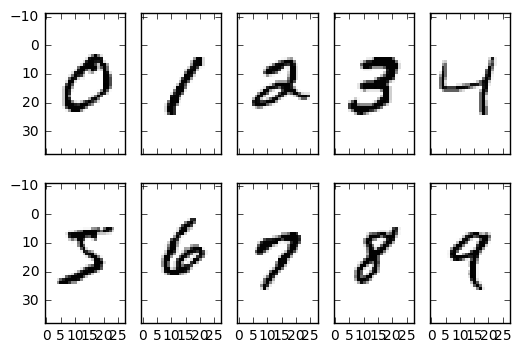

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=2, ncols=5, sharex=True, sharey=True,)
ax = ax.flatten()
for i in range(10):
    img = X_train[y_train == i][0].reshape(28, 28)
    ax[i].imshow(img, cmap='Greys', interpolation='nearest')

plt.show()

In [5]:
from sklearn.preprocessing import OneHotEncoder
vectorizer = OneHotEncoder( sparse = False )
y_train = vectorizer.fit_transform(y_train.reshape(-1, 1))
y_test = vectorizer.transform(y_test.reshape(-1, 1))

In [6]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.layers import Flatten

In [7]:
model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(50))
model.add(Activation('sigmoid'))
model.add(Dense(10))
model.add(Activation('softmax'))

In [9]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='sgd',
    metrics=['accuracy']
)

In [10]:
model.fit(
    X_train,
    y_train,
    batch_size=100,
    validation_data=(X_test, y_test),
    epochs=100
)

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 0s - loss: 1.1319 - acc: 0.7198 - val_loss: 0.7316 - val_acc: 0.8451
Epoch 2/100
60000/60000 [==============================] - 0s - loss: 0.6162 - acc: 0.8602 - val_loss: 0.5179 - val_acc: 0.8820
Epoch 3/100
60000/60000 [==============================] - 0s - loss: 0.4804 - acc: 0.8851 - val_loss: 0.4300 - val_acc: 0.8987
Epoch 4/100
60000/60000 [==============================] - 0s - loss: 0.4183 - acc: 0.8957 - val_loss: 0.3960 - val_acc: 0.9032
Epoch 5/100
60000/60000 [==============================] - 0s - loss: 0.3814 - acc: 0.9012 - val_loss: 0.3568 - val_acc: 0.9078
Epoch 6/100
60000/60000 [==============================] - 0s - loss: 0.3528 - acc: 0.9087 - val_loss: 0.3393 - val_acc: 0.9125
Epoch 7/100
60000/60000 [==============================] - 0s - loss: 0.3346 - acc: 0.9123 - val_loss: 0.3204 - val_acc: 0.9162
Epoch 8/100
60000/60000 [=============================

In [11]:
import random
import numpy as np

def predict(sample):
    real = np.argmax(y_test[sample])
    predicted = np.argmax(model.predict(X_test[sample:sample+1, :]))
    print("Sample: {}, Real: {}, Predicted: {}".format(sample, real, predicted))
    plt.imshow(X_test[sample], cmap='Greys', interpolation='nearest')
    plt.show()
    
def random_predict():
    return predict(random.randint(0, len(y_test)))

Sample: 2395, Real: 8, Predicted: 8


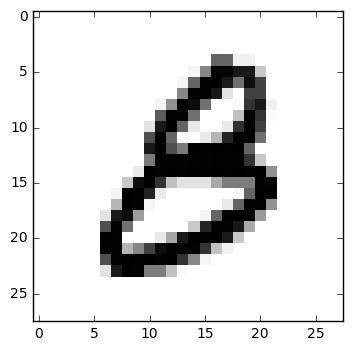

In [13]:
random_predict()

In [14]:
def problem_predicted():
    problems = []
    for sample in range(len(y_test)):
        real = np.argmax(y_test[sample])
        predicted = np.argmax(model.predict(X_test[sample:sample+1, :]))
        if real != predicted:
            problems.append(sample)
        
    return problems
        

In [15]:
problems = problem_predicted()

In [16]:
len(problems)

471

Sample: 924, Real: 2, Predicted: 7


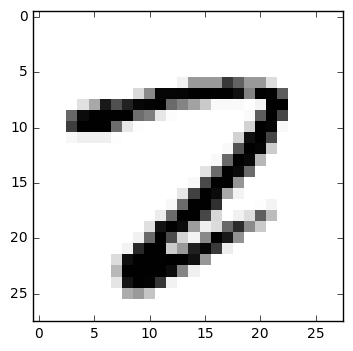

In [18]:
predict(problems[42])